#  Grupo_4_R_WH6

# 1 - Plots (Script en R y Python)

* Use la base de tados pesos.dta almacenada en la carpea \data\Pesos

Variables de la base de datos:

* lbwght : peso del bebe en logaritmo (peso medido en libras)
* cigprice: precio de la cajetilla de cigarros
* motheduc: educación de la madre
* cigs: cajetillas consumidas de cigarro
* white: origen racial de la madre
* lfaminc: logaritmo del salario real de la madre

In [1]:
pacman::p_load(tidyverse, haven, dplyr, foreign,glue, devtools)

library("ggplot2")  # plots packages
library("haven")  # read STATA.dta 
library("tidyr")  # RE for R
library("dplyr") #Para hacer filtrado
library("foreign") #Para subir las bases
library("readxl")
library("stringr") # library to RE

also installing the dependencies 'glue', 'cli', 'rcmdcheck', 'rlang', 'sessioninfo'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"


  There are binary versions available but the source versions are later:
            binary source needs_compilation
glue         1.4.2  1.6.2              TRUE
cli          2.5.0  3.3.0              TRUE
rcmdcheck    1.3.3  1.4.0             FALSE
rlang       0.4.11  1.0.2              TRUE
sessioninfo  1.1.1  1.2.2             FALSE
devtools     2.4.1  2.4.3             FALSE

  Binaries will be installed


Warning message:
"package 'glue' is in use and will not be installed"

package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Rodolfo\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\Rodolfo\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\Rodolfo\AppData\Local\Temp\RtmpOQKDYQ\downloaded_packages


installing the source packages 'rcmdcheck', 'sessioninfo', 'devtools'

Warning message in utils::install.packages(package, ...):
"installation of package 'sessioninfo' had non-zero exit status"Warning message in utils::install.packages(package, ...):
"installation of package 'rcmdcheck' had non-zero exit status"Warning message in utils::install.packages(package, ...):
"installation of package 'devtools' had non-zero exit status"Warning message in p_install(package, character.only = TRUE, ...):
""Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'devtools'"Warning message in pacman::p_load(tidyverse, haven, dplyr, foreign, glue, devtools):
"Failed to install/load:
devtools"

In [2]:
library(scales)  # for percentage scales


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



In [3]:
data <- read_dta("../data/peso.dta", encoding = "latin1")
data

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.6026900
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.0149031
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.0,-0.6931472
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.7408400
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.3141861
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0.0,2.0149031
65.0,16.5,122.3,140,16,14,2,0,1,0,4.941642,8.7500,0.0,4.1743870
27.5,16.5,122.3,86,12,14,2,0,0,0,4.454347,5.3750,0.0,3.3141861
27.5,16.5,122.3,121,12,17,2,0,1,0,4.795791,7.5625,0.0,3.3141861
37.5,16.5,122.3,129,16,18,2,0,1,0,4.859812,8.0625,0.0,3.6243410


Crear una dummy si la madre es fumadora de cigarros

In [4]:
i <- 1

nrows <- length(data$cigs)

while (i < nrows){
     if (data$cigs[i] > 0){
      data$Condición[i] = "FUMADORA"  
    } else {
        data$Condición[i] = "NO FUMADORA"   
        }
    i <- i + 1 
}


data

Warning message:
"Unknown or uninitialised column: 'Condición'."

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,Condición
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.6026900,NO FUMADORA
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.0149031,NO FUMADORA
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.0,-0.6931472,NO FUMADORA
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.7408400,NO FUMADORA
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.3141861,NO FUMADORA
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0.0,2.0149031,NO FUMADORA
65.0,16.5,122.3,140,16,14,2,0,1,0,4.941642,8.7500,0.0,4.1743870,NO FUMADORA
27.5,16.5,122.3,86,12,14,2,0,0,0,4.454347,5.3750,0.0,3.3141861,NO FUMADORA
27.5,16.5,122.3,121,12,17,2,0,1,0,4.795791,7.5625,0.0,3.3141861,NO FUMADORA
37.5,16.5,122.3,129,16,18,2,0,1,0,4.859812,8.0625,0.0,3.6243410,NO FUMADORA


In [5]:
dim(data)

[1] 1388   15

In [6]:
data0 <- data %>% filter(grepl('FUMADORA$', Condición, ignore.case=TRUE))
data0

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,Condición
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.6026900,NO FUMADORA
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.0149031,NO FUMADORA
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.0,-0.6931472,NO FUMADORA
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.7408400,NO FUMADORA
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.3141861,NO FUMADORA
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0.0,2.0149031,NO FUMADORA
65.0,16.5,122.3,140,16,14,2,0,1,0,4.941642,8.7500,0.0,4.1743870,NO FUMADORA
27.5,16.5,122.3,86,12,14,2,0,0,0,4.454347,5.3750,0.0,3.3141861,NO FUMADORA
27.5,16.5,122.3,121,12,17,2,0,1,0,4.795791,7.5625,0.0,3.3141861,NO FUMADORA
37.5,16.5,122.3,129,16,18,2,0,1,0,4.859812,8.0625,0.0,3.6243410,NO FUMADORA


In [7]:
dim(data0)

[1] 1388   15

In [8]:
data2 <- data0 %>%  mutate(Condición_Dummy = ifelse( data0$Condición== "FUMADORA" ,  1 , ifelse(!is.na(data0$Condición),0, NA) ) )

data2

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,Condición,Condición_Dummy
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.6026900,NO FUMADORA,0
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.0149031,NO FUMADORA,0
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.0,-0.6931472,NO FUMADORA,0
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.7408400,NO FUMADORA,0
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.3141861,NO FUMADORA,0
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0.0,2.0149031,NO FUMADORA,0
65.0,16.5,122.3,140,16,14,2,0,1,0,4.941642,8.7500,0.0,4.1743870,NO FUMADORA,0
27.5,16.5,122.3,86,12,14,2,0,0,0,4.454347,5.3750,0.0,3.3141861,NO FUMADORA,0
27.5,16.5,122.3,121,12,17,2,0,1,0,4.795791,7.5625,0.0,3.3141861,NO FUMADORA,0
37.5,16.5,122.3,129,16,18,2,0,1,0,4.859812,8.0625,0.0,3.6243410,NO FUMADORA,0


* En un mismo gráfico presente la distribución absoluta, frecuencia y densidades de los pesos de los recién nacidos si la madre es fumadora o no. El gráfico debe presentar titulo, títulos en ejes y leyenda.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


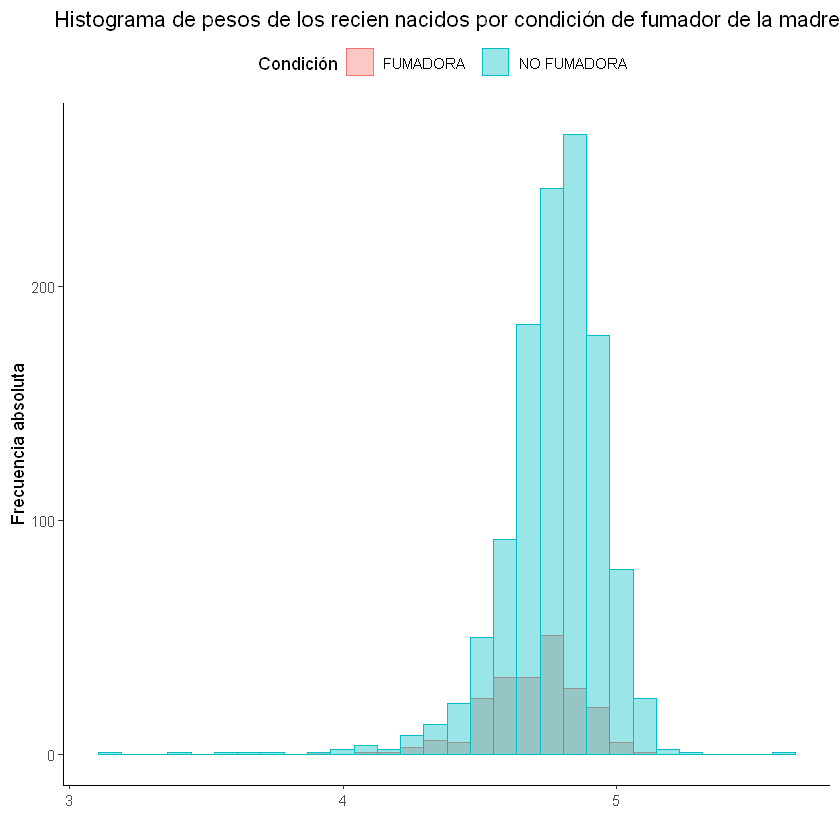

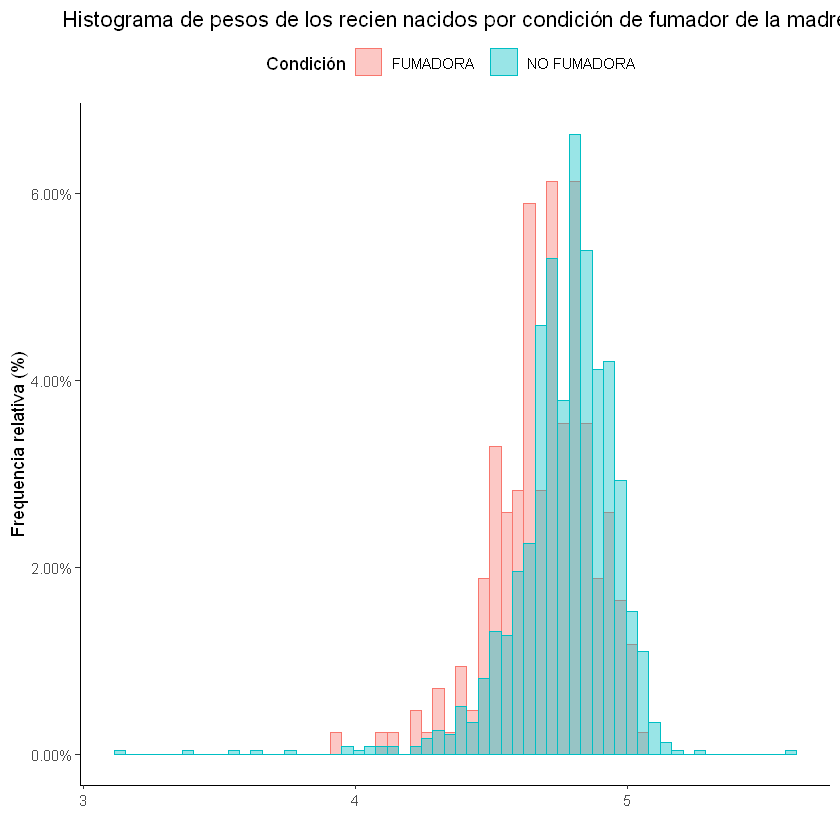

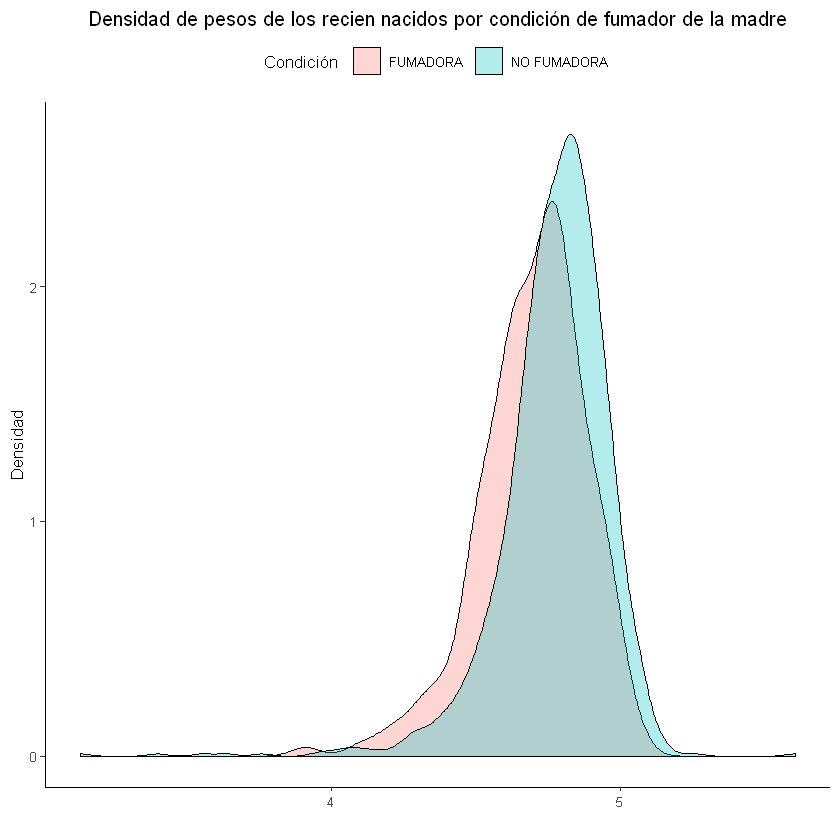

In [9]:
plot1 <- theme_set(theme_classic() + theme(legend.position = "top"))

data2 %>%  filter(!is.na(lbwght) ) %>%
 ggplot(aes(x=lbwght)) + geom_histogram(aes(color = Condición, fill = Condición),
                         alpha = 0.4, position = "identity") +
    labs(x = " ", y = "Frecuencia absoluta", title = "Histograma de pesos de los recien nacidos por condición de fumador de la madre") + 
     theme(text=element_text(size =11), plot.title = element_text(hjust = 0.5)) 

# relative histogram 

plot2 <- theme_set(theme_classic() + theme(legend.position = "top"))

data2 %>%  filter(!is.na(lbwght) ) %>%
ggplot(aes(x=lbwght, fill=Condición, color=Condición)) + geom_histogram(aes(x=lbwght, y = (..density..)/sum(..density..)),bins = 60,position = "identity", alpha=0.4) + 
          scale_y_continuous(labels=scales::percent) + labs(x = " ", y = "Frequencia relativa (%)", title = "Histograma de pesos de los recien nacidos por condición de fumador de la madre") + 
     theme(text=element_text(size =11), plot.title = element_text(hjust = 0.5)) 

plot3 <- theme_set(theme_classic() + theme(legend.position = "top"))

data2 %>% filter(!is.na(lbwght)) %>% 
ggplot(aes(x=lbwght, fill = Condición , colour=Condición)) +
  geom_density(alpha=0.3, color = "black") +
ggtitle("Densidad de pesos de los recien nacidos por condición de fumador de la madre") + theme(text=element_text(size =10), plot.title = element_text(hjust = 0.5)) +
labs(x = "", 
     y = "Densidad")

## * Crear un coefplot de las siguientes tres regresiones:

## Dummy : (motheduc + lfaminc + white) crea variables interactivas.

In [10]:
install.packages("sandwich") 

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"


  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE



installing the source package 'sandwich'



In [11]:
library(sandwich)

### a) lbwght ~ Condición_Dummy

In [12]:
data2

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,Condición,Condición_Dummy
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.6026900,NO FUMADORA,0
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.0149031,NO FUMADORA,0
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.0,-0.6931472,NO FUMADORA,0
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.7408400,NO FUMADORA,0
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.3141861,NO FUMADORA,0
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0.0,2.0149031,NO FUMADORA,0
65.0,16.5,122.3,140,16,14,2,0,1,0,4.941642,8.7500,0.0,4.1743870,NO FUMADORA,0
27.5,16.5,122.3,86,12,14,2,0,0,0,4.454347,5.3750,0.0,3.3141861,NO FUMADORA,0
27.5,16.5,122.3,121,12,17,2,0,1,0,4.795791,7.5625,0.0,3.3141861,NO FUMADORA,0
37.5,16.5,122.3,129,16,18,2,0,1,0,4.859812,8.0625,0.0,3.6243410,NO FUMADORA,0


In [13]:
attach(data2)

In [14]:
nocontrol.fit <- lm(lbwght ~ Condición_Dummy)

#funcion de la regresion (LM): lineal

summary(nocontrol.fit)
#no control: no tiene variables de control


Call:
lm(formula = lbwght ~ Condición_Dummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63628 -0.08965  0.02401  0.11857  0.83034 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.771778   0.005503 867.137  < 2e-16 ***
Condición_Dummy -0.076913   0.014081  -5.462 5.56e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1887 on 1386 degrees of freedom
Multiple R-squared:  0.02107,	Adjusted R-squared:  0.02037 
F-statistic: 29.84 on 1 and 1386 DF,  p-value: 5.563e-08


In [15]:
summary(nocontrol.fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.77177846,0.005502911,867.137073,0.000000e+00
Condición_Dummy,-0.07691258,0.014080540,-5.462332,5.563417e-08


In [16]:
summary(nocontrol.fit)$coef["Condición_Dummy",1]

[1] -0.07691258

In [17]:
HCV.coefs <- vcovHC(nocontrol.fit, type = 'HC')
HCV.coefs


,(Intercept),Condición_Dummy
(Intercept),3.054569e-05,-3.054569e-05
Condición_Dummy,-3.054569e-05,1.888275e-04


In [18]:
diag(HCV.coefs)

(Intercept) Condición_Dummy 
   3.054569e-05    1.888275e-04

In [19]:
nocontrol.fit <- lm(lbwght ~ Condición_Dummy)

nocontrol.est <- summary(nocontrol.fit)$coef["Condición_Dummy",1]

HCV.coefs1 <- vcovHC(nocontrol.fit, type = 'HC');
nocontrol.se1 <- sqrt(diag(HCV.coefs1))[2] # Estimated std errors: sacar la raiz cuadrada de los errores

# print unconditional effect of gender and the corresponding standard error
cat ("The estimated gender coefficient is",nocontrol.est," and the corresponding robust standard error is",nocontrol.se1)

The estimated gender coefficient is -0.07691258  and the corresponding robust standard error is 0.01374145

### b) lbwght ~ Condición_Dummy + motheduc 
#### OLS with controls 1

In [20]:
# Ols regression with controls

flex <- lbwght ~ Condición_Dummy + motheduc


control.fit2 <- lm(flex, data=data2)
control.est2 <- summary(control.fit2)$coef[2,1]


HCV.coefs2 <- vcovHC(control.fit2, type = 'HC');
control.se2 <- sqrt(diag(HCV.coefs2))[2] # Estimated std errors

cat ("The estimated gender coefficient is",control.est2," and the corresponding robust standard error is",control.se2) 

The estimated gender coefficient is -0.07302848  and the corresponding robust standard error is 0.01414047

In [21]:
summary(control.fit2)


Call:
lm(formula = flex, data = data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63334 -0.08727  0.02269  0.11865  0.82811 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.737780   0.029402 161.140  < 2e-16 ***
Condición_Dummy -0.073028   0.014479  -5.044 5.17e-07 ***
motheduc         0.002588   0.002193   1.180    0.238    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1887 on 1384 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0221,	Adjusted R-squared:  0.02069 
F-statistic: 15.64 on 2 and 1384 DF,  p-value: 1.916e-07


In [22]:
install.packages('xtable')
install.packages('lmtest')

library(lmtest)
library(xtable)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"

package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rodolfo\AppData\Local\Temp\RtmpOQKDYQ\downloaded_packages


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"


  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-38 0.9-40              TRUE

  Binaries will be installed
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rodolfo\AppData\Local\Temp\RtmpOQKDYQ\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'xtable' was built under R version 3.6.3"

In [23]:
table3<- matrix(0, 2, 4)
table3[1,1]<- nocontrol.est  
table3[1,2]<- nocontrol.se1   
table3[2,1]<- control.est2
table3[2,2]<- control.se2    
table3[1,3]<- coefci(nocontrol.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table3[1,4]<- coefci(nocontrol.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 
table3[2,3]<- coefci(control.fit2, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table3[2,4]<- coefci(control.fit2, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

colnames(table3)<- c("Estimate","se","lower_bound","upper_bound")
rownames(table3)<- c("OLS", "OLS with control")
tab<- xtable(table3)
tab

,Estimate,se,lower_bound,upper_bound
OLS,-0.07691258,0.01374145,-0.1038453,-0.04997983
OLS with control,-0.07302848,0.01414047,-0.1007433,-0.04531367


In [24]:
install.packages("stargazer")
library(stargazer)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"


  There is a binary version available but the source version is later:
          binary source needs_compilation
stargazer  5.2.2  5.2.3             FALSE



installing the source package 'stargazer'


Please cite as: 

 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



In [25]:
stargazer(nocontrol.fit,control.fit2,
          type = "text", 
          column.labels = c("Baseline Model", "Model with controls"),  dep.var.labels=c("Log - pesos de los recien nacidos"), 
          covariate.labels=c("Condición","Motheduc"), out="models.txt",
          title="Results",align = TRUE)

#sacar tabla para una regresion, 2 modelos,


Results
                                   Dependent variable:               
                    -------------------------------------------------
                            Log - pesos de los recien nacidos        
                         Baseline Model        Model with controls   
                              (1)                      (2)           
---------------------------------------------------------------------
Condición                  -0.077***                -0.073***        
                            (0.014)                  (0.014)         
                                                                     
Motheduc                                              0.003          
                                                     (0.002)         
                                                                     
Constant                    4.772***                 4.738***        
                            (0.006)                  (0.029)         
           

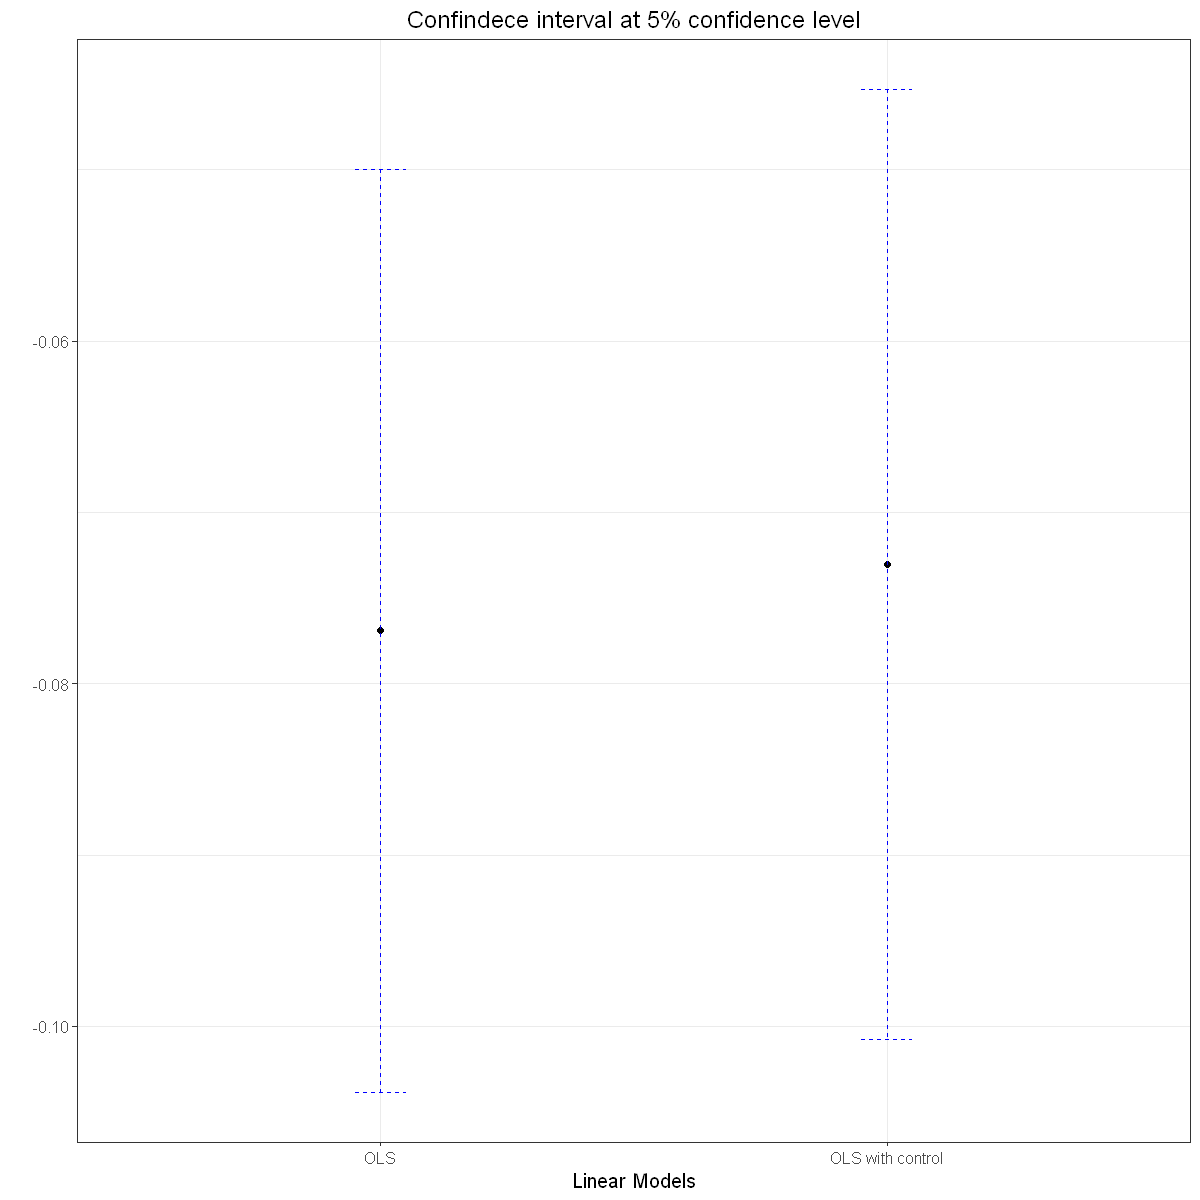

In [26]:
options(repr.plot.width = 10, repr.plot.height =10)  # plot size width (ancho); altura (high): tamaño del grafico

ggplot(tab, aes(x=rownames(tab), y=Estimate)) +
    geom_point(size=1.5) + 
    geom_errorbar(aes(ymin=lower_bound, ymax=upper_bound) , width = 0.1,color="blue", linetype="dashed") + 
  labs(x="Linear Models", y="") + ggtitle("Confindece interval at 5% confidence level") +
  theme_bw()  + theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))


### c) lbwght~ Dummy + mothedu + lfaminc + white + Dummy * mothedu + Dummy * lfaminc + Dummy * white
#### OLS with controls 2

In [27]:
# Ols regression with controls

flex2 <- lbwght ~ Condición_Dummy + motheduc + lfaminc + white + (motheduc + lfaminc +white)*(Condición_Dummy)


control.fit3<- lm(flex2, data=data2)
control.est3<- summary(control.fit3)$coef[2,1]


HCV.coefs3 <- vcovHC(control.fit3, type = 'HC');
control.se3 <- sqrt(diag(HCV.coefs3))[2] # Estimated std errors

cat ("The estimated gender coefficient is",control.est3," and the corresponding robust standard error is",control.se3) 

The estimated gender coefficient is 0.01259515  and the corresponding robust standard error is 0.08887885

In [28]:
summary(control.fit3)


Call:
lm(formula = flex2, data = data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58590 -0.08906  0.02314  0.11778  0.81391 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.695856   0.031758 147.866  < 2e-16 ***
Condición_Dummy           0.012595   0.093189   0.135    0.893    
motheduc                  0.001314   0.002493   0.527    0.598    
lfaminc                   0.003137   0.007111   0.441    0.659    
white                     0.062192   0.014332   4.340 1.53e-05 ***
Condición_Dummy:motheduc -0.008570   0.008081  -1.060    0.289    
Condición_Dummy:lfaminc   0.019471   0.016682   1.167    0.243    
Condición_Dummy:white    -0.049757   0.035563  -1.399    0.162    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1873 on 1379 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04083,	Adjusted R-squared:  0.03596 
F-sta

In [29]:
table4<- matrix(0, 3, 4)
table4[1,1]<- nocontrol.est  
table4[1,2]<- nocontrol.se1
table4[1,3]<- coefci(nocontrol.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table4[1,4]<- coefci(nocontrol.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

table4[2,1]<- control.est2
table4[2,2]<- control.se2
table4[2,3]<- coefci(control.fit2, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table4[2,4]<- coefci(control.fit2, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

table4[3,1]<- control.est3
table4[3,2]<- control.se3
table4[3,3]<- coefci(control.fit3, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table4[3,4]<- coefci(control.fit3, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

colnames(table4)<- c("Estimate","se","lower_bound","upper_bound")
rownames(table4)<- c("OLS", "OLS with controls_1","OLS with controls_2")
tab2<- xtable(table4)
tab2

,Estimate,se,lower_bound,upper_bound
OLS,-0.07691258,0.01374145,-0.1038453,-0.04997983
OLS with controls_1,-0.07302848,0.01414047,-0.1007433,-0.04531367
OLS with controls_2,0.01259515,0.08887885,-0.1616042,0.18679450


In [30]:
stargazer(nocontrol.fit,control.fit2,control.fit3,
          type = "text", 
          column.labels = c("Baseline Model", "Model with controls", "Model with controls 2"),  dep.var.labels=c("Log - pesos de los recien nacidos"), 
          covariate.labels=c(""), out="models.txt",
          title="Results",align = TRUE)

#sacar tabla para una regresion, 3 modelos,


Results
                                                    Dependent variable:                           
                         -------------------------------------------------------------------------
                                             Log - pesos de los recien nacidos                    
                              Baseline Model        Model with controls     Model with controls 2 
                                   (1)                      (2)                      (3)          
--------------------------------------------------------------------------------------------------
                                -0.077***                -0.073***                  0.013         
                                 (0.014)                  (0.014)                  (0.093)        
                                                                                                  
motheduc                                                   0.003                    0.001         
 

In [31]:
tab2

,Estimate,se,lower_bound,upper_bound
OLS,-0.07691258,0.01374145,-0.1038453,-0.04997983
OLS with controls_1,-0.07302848,0.01414047,-0.1007433,-0.04531367
OLS with controls_2,0.01259515,0.08887885,-0.1616042,0.18679450


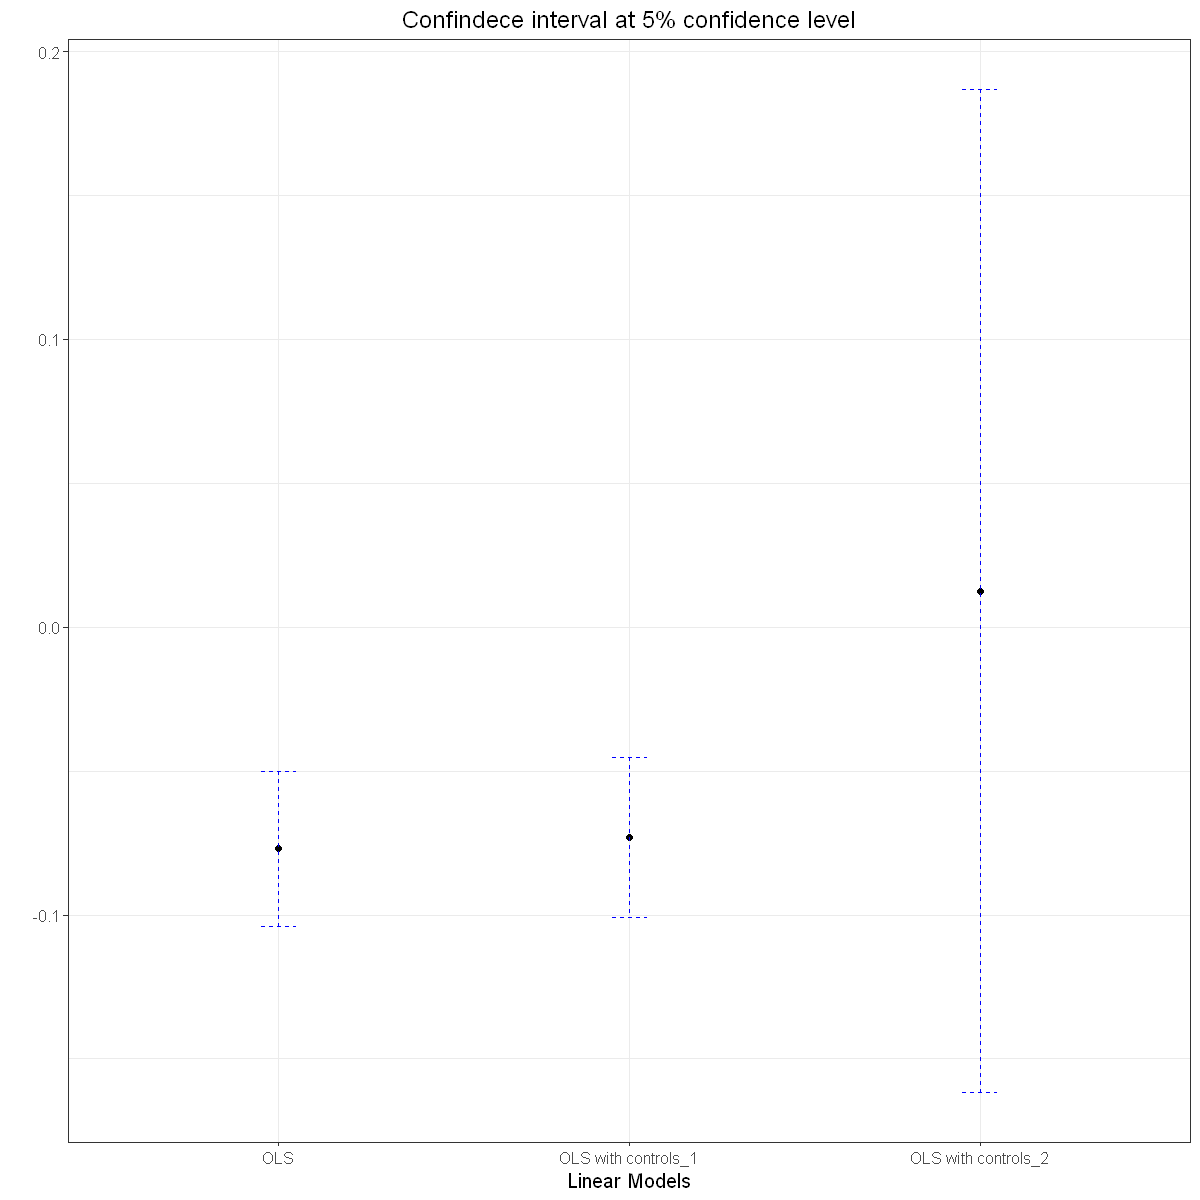

In [32]:
options(repr.plot.width = 10, repr.plot.height =10)  # plot size width (ancho); altura (high): tamaño del grafico

ggplot(tab2, aes(x = rownames(tab2), y = Estimate)) +
    geom_point(size=1.5) + 
    geom_errorbar(aes(ymin=lower_bound, ymax=upper_bound) , width = 0.1,color="blue", linetype="dashed") + 
  labs(x="Linear Models", y="") + ggtitle("Confindece interval at 5% confidence level") +
  theme_bw()  + theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))

# 2 - Regular expresión y Geocoding

In [57]:
library(readxl)

CSM <- read_excel("../data/Centro_salud/Centro_salud_mental.xls")

In [58]:
CSM

Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución_ruc
CALLAO,CALLAO,LA PERLA,070104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL 20147907487
LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzano Rimac. Costado de la Veterinaria Municipal,MINSA 20602217508
AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,040129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN BOLÍVAR DISTRITO JOSE LUIS BUSTAMANTE Y RIVERO PROVINCIA AREQUIPA DEPARTAMENTO AREQUIPA,GOBIERNO REGIONAL 20172661794
LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la Av. Los,MINSA 20602217508
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Blanca--- EL PORVENIR TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLORENCIA DE MORA TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL PORVENIR PROVINCIA TRUJILLO DEPARTAMENTO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BELLA S/N TRUJILLO TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
APURIMAC,ANDAHUAYLAS,TALAVERA,030216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCADO DE TALAVERA TALAVERA ANDAHUAYLAS APURIMAC,GOBIERNO REGIONAL 20199917928
LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVINCIA LORETO DEPARTAMENTO LORETO,GOBIERNO REGIONAL


In [59]:
DF1 <- CSM$Institución_ruc
DF1

[1] "GOBIERNO REGIONAL 20147907487" "MINSA 20602217508"            
 [3] "GOBIERNO REGIONAL 20172661794" "MINSA 20602217508"            
 [5] "GOBIERNO REGIONAL 20218911189" "GOBIERNO REGIONAL 20218911189"
 [7] "GOBIERNO REGIONAL 20218911189" "GOBIERNO REGIONAL 20218911189"
 [9] "GOBIERNO REGIONAL 20199917928" "GOBIERNO REGIONAL"            
[11] "MINSA 20602251641"             "MINSA 20602250602"            
[13] "GOBIERNO REGIONAL 20172661794" "GOBIERNO REGIONAL 20490215850"
[15] "GOBIERNO REGIONAL 20450736539" "GOBIERNO REGIONAL 20145686548"
[17] "GOBIERNO REGIONAL 20222308080" "MINSA 20602217508"            
[19] "GOBIERNO REGIONAL 20199565398" "GOBIERNO REGIONAL 20170258054"
[21] "GOBIERNO REGIONAL 20171001065" "GOBIERNO REGIONAL 20165645325"
[23] "GOBIERNO REGIONAL 20489252601" "GOBIERNO REGIONAL 20602799973"
[25] "GOBIERNO REGIONAL 20172661794" "GOBIERNO REGIONAL 20603980248"
[27] "GOBIERNO REGIONAL 20191045671" "GOBIERNO REGIONAL 20490215850"
[29] "MINSA 20602250602"             "GOBIERNO REGIONAL 20170258054"
[31] "GOBIERNO REGIONAL 20450241564" "GOBIERNO REGIONAL 20171178585"
[33] "GOBIERNO REGIONAL 20163833094" "GOBIERNO REGIONAL 20156003817"
[35] "GOBIERNO REGIONAL"             "MINSA 20602251641"            
[37] "GOBIERNO REGIONAL 20491240742" "GOBIERNO REGIONAL 20531320574"
[39] "GOBIERNO REGIONAL 20167237895" "GOBIERNO REGIONAL 20145686548"
[41] "GOBIERNO REGIONAL 20145686548" "GOBIERNO REGIONAL 20145686548"
[43] "GOBIERNO REGIONAL 20156176240" "GOBIERNO REGIONAL 20452308992"
[45] "GOBIERNO REGIONAL 20486391279" "MINSA 20602250602"            
[47] "GOBIERNO REGIONAL 20172661794" "GOBIERNO REGIONAL 20171001065"
[49] "GOBIERNO REGIONAL 20411038506" "GOBIERNO REGIONAL 20171178585"
[51] "GOBIERNO REGIONAL 20162197461" "GOBIERNO REGIONAL 20600985206"
[53] "MINSA 20602236596"             "GOBIERNO REGIONAL 20534791381"
[55] "GOBIERNO REGIONAL 20528442154" "GOBIERNO REGIONAL 20363839500"

In [60]:
Institución <- c()

for (i in 1:length(DF1)){
        w <-  gsub("[^A-Za-z]+",'', DF1[i])
        Institución[i] <- w
        print(w)    
}

[1] "GOBIERNOREGIONAL"
[1] "MINSA"
[1] "GOBIERNOREGIONAL"
[1] "MINSA"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "MINSA"
[1] "MINSA"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "MINSA"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "MINSA"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "MINSA"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "GOBIERNOREGIONAL"
[1] "MINSA"
[1] "GOBIERNOREGIONAL"
[1] "GO

In [61]:
RUC <- c()

for (i in 1:length(DF1)){
        q <-  gsub("[^0-9]",'', DF1[i])
        RUC[i] <- q
        print(q)    
}

[1] "20147907487"
[1] "20602217508"
[1] "20172661794"
[1] "20602217508"
[1] "20218911189"
[1] "20218911189"
[1] "20218911189"
[1] "20218911189"
[1] "20199917928"
[1] ""
[1] "20602251641"
[1] "20602250602"
[1] "20172661794"
[1] "20490215850"
[1] "20450736539"
[1] "20145686548"
[1] "20222308080"
[1] "20602217508"
[1] "20199565398"
[1] "20170258054"
[1] "20171001065"
[1] "20165645325"
[1] "20489252601"
[1] "20602799973"
[1] "20172661794"
[1] "20603980248"
[1] "20191045671"
[1] "20490215850"
[1] "20602250602"
[1] "20170258054"
[1] "20450241564"
[1] "20171178585"
[1] "20163833094"
[1] "20156003817"
[1] ""
[1] "20602251641"
[1] "20491240742"
[1] "20531320574"
[1] "20167237895"
[1] "20145686548"
[1] "20145686548"
[1] "20145686548"
[1] "20156176240"
[1] "20452308992"
[1] "20486391279"
[1] "20602250602"
[1] "20172661794"
[1] "20171001065"
[1] "20411038506"
[1] "20171178585"
[1] "20162197461"
[1] "20600985206"
[1] "20602236596"
[1] "20534791381"
[1] "20528442154"
[1] "20363839500"


In [62]:
CSM <- CSM %>% add_column(Institución)
CSM <- CSM %>% add_column(RUC)
CSM

Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución_ruc,Institución,RUC
CALLAO,CALLAO,LA PERLA,070104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL 20147907487,GOBIERNOREGIONAL,20147907487
LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzano Rimac. Costado de la Veterinaria Municipal,MINSA 20602217508,MINSA,20602217508
AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,040129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN BOLÍVAR DISTRITO JOSE LUIS BUSTAMANTE Y RIVERO PROVINCIA AREQUIPA DEPARTAMENTO AREQUIPA,GOBIERNO REGIONAL 20172661794,GOBIERNOREGIONAL,20172661794
LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la Av. Los,MINSA 20602217508,MINSA,20602217508
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Blanca--- EL PORVENIR TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNOREGIONAL,20218911189
LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLORENCIA DE MORA TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNOREGIONAL,20218911189
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL PORVENIR PROVINCIA TRUJILLO DEPARTAMENTO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNOREGIONAL,20218911189
LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BELLA S/N TRUJILLO TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNOREGIONAL,20218911189
APURIMAC,ANDAHUAYLAS,TALAVERA,030216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCADO DE TALAVERA TALAVERA ANDAHUAYLAS APURIMAC,GOBIERNO REGIONAL 20199917928,GOBIERNOREGIONAL,20199917928
LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVINCIA LORETO DEPARTAMENTO LORETO,GOBIERNO REGIONAL,GOBIERNOREGIONAL,
